In [1]:
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
# REPORT_PATH = '../2020-12/TNSM_report_until_dec_1_2020.xlsx'
REPORT_PATH = '../2021-06/TNSM_report_until_june_1_2021.xlsx'
IEEE_REG_PATH = './regions.json'
FIELDS_PATH = './fields.json'

with open(FIELDS_PATH, 'r') as fields_file:
    COLUMNS = json.load(fields_file)

with open(IEEE_REG_PATH, 'r') as reg_file:
    REGIONS = json.load(reg_file)

country_region = {v: k for k, values in REGIONS.items() for v in values}

In [3]:
report_df = pd.read_excel(REPORT_PATH, engine='openpyxl')
report_df = report_df[report_df['Manuscript ID - Original'] != 'draft']
report_df = report_df[report_df['Manuscript ID - Latest'] != 'draft']
report_df.head()

,Manuscript ID - Original,Manuscript ID - Latest,Manuscript Title,Manuscript Status,Original Submission Date,Submission Month,Submission Month Number,Submission Year,Submitting Author Name,Submitting Author E-mail,...,Latest Decision,Latest Decision Date,Accept or Reject Final Decision,Due Date of Latest Revision,# Revisions,# Resubmissions,# Days Between Original Submission & Original Decision,# Days Between Original Submission & Final Decision,# Days Since Original Submission,# Days Since Latest Submission
0,TNSM-2013-00448,TNSM-2013-00448.R2,Proactive Workload Management in Hybrid Cloud ...,Accept-Not a Candidate for Best Paper Award,2013-01-31 20:22:29.999712,January,1.0,2013.0,"Zhang, Hui",huizhang@nec-labs.com,...,Accept-Not a Candidate for Best Paper Award,2013-12-02 09:41:55.999968,Accept,NaT,2,0,209.0,305.0,3042 dagen 23 uur 55 minuten 49 seconden 464 m...,2744 dagen 5 uur 38 minuten 26 seconden 289 mi...
1,TNSM-2013-00480,TNSM-2013-00480,Distributed and Coordinated Load Shedding in D...,Major Revision,2013-03-14 20:51:14.999904,March,3.0,2013.0,"basaran, can",cbasaran@dgist.ac.kr,...,Major Revision,2013-06-28 15:42:10.999872,NaN,2013-08-27 22:58:59.999232,0,0,106.0,NaN,3000 dagen 23 uur 27 minuten 4 seconden 91 mil...,3000 dagen 23 uur 27 minuten 4 seconden 91 mil...
2,TNSM-2010-00055,TNSM-2010-00055.R1,Efficient Control of False Negative and False ...,Accept-Possible Candidate for Best Paper Award,2010-07-01 14:16:51.999456,July,7.0,2010.0,"Goldstein, Maayan",maayang@il.ibm.com,...,Accept-Possible Candidate for Best Paper Award,2010-11-17 09:52:30.999360,Accept,NaT,1,0,80.0,139.0,3988 dagen 6 uur 1 minuut 27 seconden 508 mill...,3865 dagen 14 uur 2 minuten 52 seconden 667 mi...
3,TNSM-2013-00474,TNSM-2013-00474.R1,"In a Telco-CDN, Pushing Content Makes Sense",Accept-Possible Candidate for Best Paper Award,2013-02-16 05:32:15.999936,February,2.0,2013.0,"Li, Zhe",zhe.li@telecom-bretagne.eu,...,Accept-Possible Candidate for Best Paper Award,2013-04-21 04:45:43.999488,Accept,NaT,1,0,49.0,64.0,3027 dagen 14 uur 46 minuten 3 seconden 495 mi...,2964 dagen 1 uur 39 minuten 31 seconden 15 mil...
4,TNSM-2016-00975,TNSM-2016-00975.R1,An Optimized Virtual Load Balanced Call Admiss...,Accept-Not a Candidate for Best Paper Award,2016-02-04 15:27:17.999712,February,2.0,2016.0,"Yaghmaee Moghaddam, Mohammad Hossein",YAGHMAEE@IEEE.ORG,...,Accept-Not a Candidate for Best Paper Award,2016-05-18 17:58:04.999872,Accept,NaT,1,0,72.0,104.0,1944 dagen 4 uur 51 minuten 0 seconden 926 mil...,1857 dagen 22 uur 27 minuten 8 seconden 681 mi...


In [4]:
set(report_df.columns)

{'# Days Between Original Submission & Final Decision',
 '# Days Between Original Submission & Original Decision',
 '# Days Since Latest Submission',
 '# Days Since Original Submission',
 '# Resubmissions',
 '# Revisions',
 'Accept or Reject Final Decision',
 'Author Names',
 'Contact Author Country/Region',
 'Contact Author Email',
 'Contact Author Name',
 'Corresponding Author Country/Region',
 'Corresponding Author Email',
 'Corresponding Author Name',
 'Due Date of Latest Revision',
 'Editor Names',
 'First Decision',
 'First Decision Date',
 'Latest Decision',
 'Latest Decision Date',
 'Manuscript ID - Latest',
 'Manuscript ID - Original',
 'Manuscript Status',
 'Manuscript Title',
 'Original Submission Date',
 'Submission Month',
 'Submission Month Number',
 'Submission Year',
 'Submitting Author Country/Region',
 'Submitting Author E-mail',
 'Submitting Author Name'}

In [5]:
set(COLUMNS)

{'# Days Between Original Submission & Final Decision',
 '# Days Between Original Submission & Original Decision',
 '# Days Since Latest Submission',
 '# Days Since Original Submission',
 '# Resubmissions',
 '# Revisions',
 'Accept or Reject Final Decision',
 'Contact Author Country/Region',
 'Corresponding Author Country/Region',
 'Editor Names',
 'First Decision',
 'First Decision Date',
 'Latest Decision',
 'Latest Decision Date',
 'Manuscript ID - Latest',
 'Manuscript ID - Original',
 'Manuscript Status',
 'Original Submission Date',
 'Submission Month',
 'Submission Month Number',
 'Submission Year'}

In [6]:
# test if the required columns are present in the provide report

assert set(COLUMNS).issubset(set(report_df.columns))

In [7]:
# computing complementary fields   

def get_status_category(r):
    if pd.notnull(r['Manuscript Status']):
        if 'Accept' in r['Manuscript Status']:
            return 'Accept'
        elif 'Reject' in r['Manuscript Status']:
            return 'Reject'
        elif 'Withdrawn' in r['Manuscript Status']:
            return 'Withdrawn'
        # Papers which have not been withdrawn, for which the status is not 'Reject & Resubmit' and no final decision has been made are still in process
        elif 'Withdrawn' not in r['Manuscript Status'] and 'Reject & Resubmit' != r['Manuscript Status'] and not pd.notnull(r['Accept or Reject Final Decision']) and pd.notnull(r['Revised']):
            return 'Still in process'
        else:
            return np.nan
    else: # Papers without Manuscript status are still in process
        return 'Still in process'        
    

report_df['First Decision Month Number'] = pd.DatetimeIndex(report_df['First Decision Date']).month
report_df['First Decision Year'] = pd.DatetimeIndex(report_df['First Decision Date']).year
report_df['Latest Decision Month Number'] = pd.DatetimeIndex(report_df['Latest Decision Date']).month
report_df['Latest Decision Year'] = pd.DatetimeIndex(report_df['Latest Decision Date']).year
report_df['Revised'] = report_df.apply(lambda r: '.R' in r['Manuscript ID - Latest'] if type(r['Manuscript ID - Latest']) != float else np.nan , axis=1)
report_df['Current Status Category'] = report_df.apply(get_status_category, axis=1)
report_df['Region'] = report_df['Contact Author Country/Region'].apply(lambda k: country_region[k] if pd.notnull(k) else np.nan)

In [8]:
report_df[report_df['Manuscript Status'].isnull()]

,Manuscript ID - Original,Manuscript ID - Latest,Manuscript Title,Manuscript Status,Original Submission Date,Submission Month,Submission Month Number,Submission Year,Submitting Author Name,Submitting Author E-mail,...,# Days Between Original Submission & Final Decision,# Days Since Original Submission,# Days Since Latest Submission,First Decision Month Number,First Decision Year,Latest Decision Month Number,Latest Decision Year,Revised,Current Status Category,Region
1142,TNSM-2018-02143,Draft(TNSM-2018-02143.R1),RADS: Real-time Anomaly Detection System for C...,NaN,2018-11-06 16:41:10.000032,November,11.0,2018.0,"Barbhuiya, Sakil",sakil.barbhuiya@qub.ac.uk,...,NaN,938 dagen 3 uur 37 minuten 9 seconden 492 mill...,NaN,2.0,2019.0,NaN,NaN,True,Still in process,"Region 8 (Europe, Africa, Middle East)"
1820,TNSM-2018-01867,Draft(TNSM-2018-01867.R1),Fast Privacy-Preserving Network Function Outso...,NaN,2018-04-14 03:32:01.999968,April,4.0,2018.0,"Jourjon, Guillaume",guillaume.jourjon@data61.csiro.au,...,NaN,1144 dagen 16 uur 46 minuten 17 seconden 490 m...,NaN,6.0,2018.0,NaN,NaN,True,Still in process,Region 10 (Asia / Pacific)
3326,TNSM-2020-03138,Draft(TNSM-2020-03138.R1),Enabling Mobility in LTE-Compatible Mobile-edg...,NaN,2020-05-26 01:20:12.999264,May,5.0,2020.0,"Aghdai, Ashkan",ashkan.aghdai@nyu.edu,...,NaN,371 dagen 18 uur 58 minuten 6 seconden 585 mil...,NaN,8.0,2020.0,NaN,NaN,True,Still in process,Region 1 - 6 (U.S.A.)
3627,TNSM-2020-03412,Draft(TNSM-2020-03412.R1),SOCI: Scheduling Coflows with Online Identific...,NaN,2020-09-20 00:07:14.999808,September,9.0,2020.0,"Ruan, Chang",ruanchang@csu.edu.cn,...,NaN,254 dagen 20 uur 11 minuten 4 seconden 776 mil...,NaN,4.0,2021.0,NaN,NaN,True,Still in process,Region 10 (Asia / Pacific)


In [9]:
# count_type: ['original', 'revised', 'total']

def filter_submitted_per_year(year, count_type='total'):
    if count_type == 'total':
        return report_df[report_df['Submission Year'] == year].copy()
    elif count_type == 'original':
        return report_df[(report_df['Submission Year'] == year) & (report_df['Revised'] == False)].copy()
    else:
        return report_df[(report_df['Submission Year'] == year) & (report_df['Revised'] == True)].copy()

def filter_submitted_per_date_range(from_date, to_date):
    return report_df[(report_df['Original Submission Date'] >= from_date) & (report_df['Original Submission Date'] <= to_date)].copy() 


def count_submitted_per_year(year, count_type='total'):
    return filter_submitted_per_year(year, count_type).shape[0]

def count_submitted_per_date_range(from_date, to_date):
    return filter_submitted_per_date_range(from_date, to_date).shape[0] 

count_submitted_per_year(2020, 'total')
count_submitted_per_date_range('2020-01-01', '2020-11-30')

782

In [10]:
filter_submitted_per_year(2021)['Manuscript Status'].value_counts()

Awaiting Reviewer Scores                       149
Reject                                          96
Major Revision                                  26
Assign Reviewers;Awaiting Reviewer Scores       21
Reject & Resubmit                               19
Accept-Not a Candidate for Best Paper Award     10
Make Recommendation                              9
Select Reviewers                                 8
Assign Reviewers                                 7
Withdrawn                                        4
Make Decision                                    4
Assign AE                                        3
Minor Revision                                   3
Awaiting Reviewer Scores;Select Reviewers        2
Awaiting Reviewer Scores;Invite Reviewers        2
Invite Reviewers                                 1
Name: Manuscript Status, dtype: int64

In [11]:
status_count_df = report_df.groupby(['Current Status Category', 'Submission Year']).size().unstack(fill_value=0)
status_count_df.loc["Submitted"] = status_count_df.sum()
status_count_df.loc["Acceptance rate"] = (status_count_df.loc['Accept'] / status_count_df.loc['Submitted']) * 100

In [12]:
status_count_df.round(2)

Submission Year,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
Current Status Category,,,,,,,,,,,,
Accept,32.00,33.00,38.0,28.00,41.0,63.00,85.00,128.00,156.00,173.00,269.00,10.00
Reject,58.00,66.00,117.0,157.00,88.0,96.00,181.00,255.00,290.00,295.00,454.00,115.00
Still in process,2.00,2.00,0.0,3.00,4.0,2.00,4.00,6.00,9.00,3.00,90.00,235.00
Withdrawn,6.00,1.00,4.0,4.00,1.0,6.00,8.00,3.00,3.00,4.00,9.00,4.00
Submitted,98.00,102.00,159.0,192.00,134.0,167.00,278.00,392.00,458.00,475.00,822.00,364.00
Acceptance rate,32.65,32.35,23.9,14.58,30.6,37.72,30.58,32.65,34.06,36.42,32.73,2.75


In [13]:
subms_region_df = report_df.groupby(['Region', 'Submission Year']).size().unstack(fill_value=0)
subms_region_df = ((subms_region_df / subms_region_df.sum())*100)
subms_region_df.round(2)

Submission Year,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
Region,,,,,,,,,,,,
Region 1 - 6 (U.S.A.),21.43,26.47,22.01,15.62,16.42,16.17,11.87,10.97,9.39,7.82,9.62,7.42
Region 10 (Asia / Pacific),33.67,28.43,40.88,41.15,41.79,46.11,38.13,48.72,47.60,52.22,49.21,57.42
Region 7 (Canada),8.16,8.82,7.55,4.69,6.72,5.39,8.63,4.85,5.02,4.23,4.75,3.30
"Region 8 (Europe, Africa, Middle East)",33.67,32.35,27.04,36.46,32.09,31.14,38.49,32.65,34.50,31.08,32.03,27.20
"Region 9 (Central, South America)",3.06,3.92,2.52,2.08,2.99,1.20,2.88,2.81,3.49,4.65,4.38,4.67


In [14]:
accept_region_df = report_df[report_df['Accept or Reject Final Decision'] == 'Accept'].groupby(['Region', 'Latest Decision Year']).size().unstack(fill_value=0)
accept_region_df = ((accept_region_df / accept_region_df.sum())*100)
accept_region_df.round(2)

Latest Decision Year,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
Region,,,,,,,,,,,,
Region 1 - 6 (U.S.A.),14.29,23.53,38.46,26.67,13.33,19.61,17.11,16.96,15.04,8.77,9.31,9.09
Region 10 (Asia / Pacific),14.29,23.53,23.08,30.00,26.67,29.41,21.05,31.25,36.28,39.18,38.46,37.76
Region 7 (Canada),0.00,5.88,7.69,10.00,3.33,9.80,9.21,9.82,6.19,8.19,6.48,6.29
"Region 8 (Europe, Africa, Middle East)",71.43,35.29,28.21,33.33,53.33,41.18,48.68,40.18,38.05,42.11,42.11,41.96
"Region 9 (Central, South America)",0.00,11.76,2.56,0.00,3.33,0.00,3.95,1.79,4.42,1.75,3.64,4.90


In [15]:
# Longest First Review
days_original_decision_max_idx = [idx[1] for idx in report_df.loc[report_df['Revised'] == False, :].groupby(['Submission Year'])['# Days Between Original Submission & Original Decision'].nlargest(1).index]
max_original_decision_df = report_df[['Submission Year', '# Days Between Original Submission & Original Decision', 'Manuscript ID - Latest']].loc[days_original_decision_max_idx].set_index('Submission Year')
max_original_decision_df

,# Days Between Original Submission & Original Decision,Manuscript ID - Latest
Submission Year,,
2010.0,239.0,TNSM-2010-00094
2011.0,246.0,TNSM-2011-00119
2012.0,334.0,TNSM-2012-00337
2013.0,249.0,TNSM-2013-00568
2014.0,225.0,TNSM-2013-00599
2015.0,188.0,TNSM-2015-00916
2016.0,167.0,TNSM-2017-01564
2017.0,268.0,TNSM-2017-01500
2018.0,252.0,TNSM-2018-01837


In [16]:
# Longest Second+ Review
days_second_review_max_idx = [idx[1] for idx in report_df.loc[report_df['Revised'] == True, :].groupby(['Submission Year'])['# Days Between Original Submission & Original Decision'].nlargest(1).index]
max_second_review_df = report_df[['Submission Year', '# Days Between Original Submission & Original Decision', 'Manuscript ID - Latest']].loc[days_second_review_max_idx].set_index('Submission Year')
max_second_review_df

,# Days Between Original Submission & Original Decision,Manuscript ID - Latest
Submission Year,,
2010.0,337.0,TNSM-2010-00058.R1
2011.0,283.0,TNSM-2011-00202.R1
2012.0,325.0,TNSM-2012-00293.R2
2013.0,249.0,TNSM-2013-00491.R1
2014.0,158.0,TNSM-2014-00608.R1
2015.0,179.0,TNSM-2015-00777.R3
2016.0,171.0,TNSM-2016-01055.R3
2017.0,224.0,TNSM-2017-01595.R1
2018.0,266.0,TNSM-2018-02183.R2


In [17]:
# Longest Overall Review (from submission to final decision)
days_final_decision_max_idx = [idx[1] for idx in report_df.groupby(['Submission Year'])['# Days Between Original Submission & Final Decision'].nlargest(1).index]
max_final_decision_df = report_df[['Submission Year', '# Days Between Original Submission & Final Decision', 'Manuscript ID - Latest']].loc[days_final_decision_max_idx].set_index('Submission Year')
max_final_decision_df

,# Days Between Original Submission & Final Decision,Manuscript ID - Latest
Submission Year,,
2010.0,662.0,TNSM-2010-00027.R2
2011.0,606.0,TNSM-2011-00201.R2
2012.0,720.0,TNSM-2012-00293.R2
2013.0,624.0,TNSM-2013-00433.R2
2014.0,545.0,TNSM-2015-00861.R1
2015.0,777.0,TNSM-2016-01152.R3
2016.0,618.0,TNSM-2017-01269.R3
2017.0,660.0,TNSM-2018-02091.R1
2018.0,886.0,TNSM-2020-02947.R1


Text(0.5, 1.0, 'CDF: # Days Between Original Submission & Original Decision')

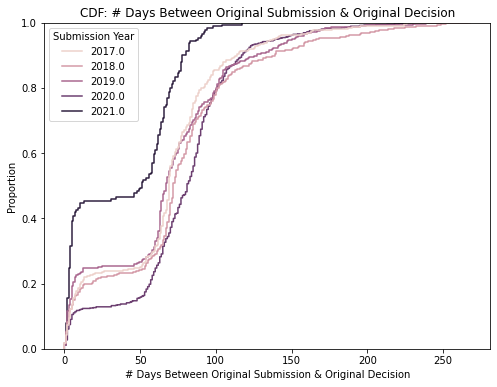

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
sns.ecdfplot(data=report_df[report_df['Submission Year'].max() - report_df['Submission Year'] < 5], x="# Days Between Original Submission & Original Decision", hue="Submission Year", ax=ax)
ax.set_title('CDF: # Days Between Original Submission & Original Decision')

In [21]:
report_df[["Submission Year", "# Days Between Original Submission & Original Decision"]].groupby("Submission Year").describe().T

Submission Year                                               2010.0  \
# Days Between Original Submission & Original D... count   95.000000   
                                                   mean    85.978947   
                                                   std     75.060398   
                                                   min      0.000000   
                                                   25%     10.500000   
                                                   50%     80.000000   
                                                   75%    136.000000   
                                                   max    337.000000   

Submission Year                                               2011.0  \
# Days Between Original Submission & Original D... count  101.000000   
                                                   mean    80.435644   
                                                   std     70.201484   
                                                   min      0.000000   
                                                   25%      6.000000   
                                                   50%     75.000000   
                                                   75%    120.000000   
                                                   max    283.000000   

Submission Year                                               2012.0  \
# Days Between Original Submission & Original D... count  155.000000   
                                                   mean    88.658065   
                                                   std     91.792923   
                                                   min      0.000000   
                                                   25%      4.000000   
                                                   50%     68.000000   
                                                   75%    140.500000   
                                                   max    334.000000   

Submission Year                                               2013.0  \
# Days Between Original Submission & Original D... count  188.000000   
                                                   mean    80.707447   
                                                   std     72.872128   
                                                   min      0.000000   
                                                   25%      6.750000   
                                                   50%     80.000000   
                                                   75%    118.250000   
                                                   max    249.000000   

Submission Year                                               2014.0  \
# Days Between Original Submission & Original D... count  133.000000   
                                                   mean    62.819549   
                                                   std     44.955337   
                                                   min      0.000000   
                                                   25%     16.000000   
                                                   50%     69.000000   
                                                   75%     84.000000   
                                                   max    225.000000   

Submission Year                                               2015.0  \
# Days Between Original Submission & Original D... count  161.000000   
                                                   mean    68.583851   
                                                   std     42.338452   
                                                   min      0.000000   
                                                   25%     48.000000   
                                                   50%     72.000000   
                                                   75%     94.000000   
                                                   max    188.000000   

Submission Year                                               2016.0  \
# Days Between Original Submission

Text(0.5, 1.0, 'CDF: # Days Between Original Submission & Final Decision')

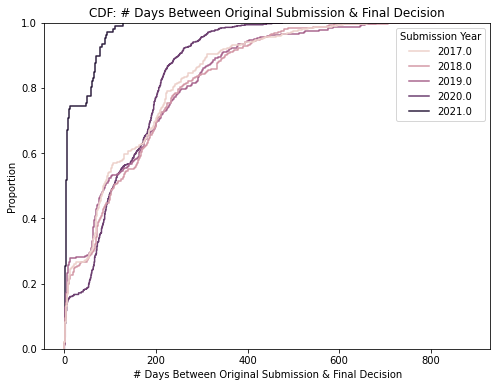

In [22]:
fig, ax = plt.subplots(figsize=(8,6))
sns.ecdfplot(data=report_df[report_df['Submission Year'].max() - report_df['Submission Year'] < 5], x="# Days Between Original Submission & Final Decision", hue="Submission Year", ax=ax)
ax.set_title('CDF: # Days Between Original Submission & Final Decision')

In [23]:
report_df[["Submission Year", "# Days Between Original Submission & Final Decision"]].groupby("Submission Year").describe().T

Submission Year                                               2010.0  \
# Days Between Original Submission & Final Deci... count   81.000000   
                                                   mean   178.975309   
                                                   std    169.870537   
                                                   min      0.000000   
                                                   25%     12.000000   
                                                   50%    157.000000   
                                                   75%    283.000000   
                                                   max    662.000000   

Submission Year                                               2011.0  \
# Days Between Original Submission & Final Deci... count   95.000000   
                                                   mean   163.673684   
                                                   std    140.413708   
                                                   min      0.000000   
                                                   25%     43.500000   
                                                   50%    145.000000   
                                                   75%    248.500000   
                                                   max    606.000000   

Submission Year                                               2012.0  \
# Days Between Original Submission & Final Deci... count  140.000000   
                                                   mean   154.157143   
                                                   std    158.317424   
                                                   min      0.000000   
                                                   25%      5.000000   
                                                   50%    120.000000   
                                                   75%    221.000000   
                                                   max    720.000000   

Submission Year                                               2013.0  \
# Days Between Original Submission & Final Deci... count  171.000000   
                                                   mean   109.152047   
                                                   std    122.492642   
                                                   min      0.000000   
                                                   25%      5.500000   
                                                   50%     80.000000   
                                                   75%    188.500000   
                                                   max    624.000000   

Submission Year                                               2014.0  \
# Days Between Original Submission & Final Deci... count  111.000000   
                                                   mean   127.099099   
                                                   std    134.769632   
                                                   min      0.000000   
                                                   25%     10.000000   
                                                   50%     82.000000   
                                                   75%    215.000000   
                                                   max    545.000000   

Submission Year                                               2015.0  \
# Days Between Original Submission & Final Deci... count  139.000000   
                                                   mean   135.762590   
                                                   std    133.504306   
                                                   min      0.000000   
                                                   25%     48.000000   
                                                   50%     95.000000   
                                                   75%    208.500000   
                                                   max    777.000000   

Submission Year                                               2016.0  \
# Days Between Original Submission

In [21]:
accept_subms_df = pd.pivot_table(report_df[report_df['Accept or Reject Final Decision'] == 'Accept'], values='Manuscript ID - Original', index=['Latest Decision Year'], columns=['Submission Year'], aggfunc='count', margins=True).fillna('')
accept_subms_df

Submission Year,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,All
Latest Decision Year,,,,,,,,,,,,,
2010.0,7,,,,,,,,,,,,7
2011.0,22,12,,,,,,,,,,,34
2012.0,3,20,16,,,,,,,,,,39
2013.0,,1,18,11,,,,,,,,,30
2014.0,,,4,17,9,,,,,,,,30
2015.0,,,,,30,21,,,,,,,51
2016.0,,,,,2,39,35,,,,,,76
2017.0,,,,,,2,45,65,,,,,112
2018.0,,,,,,1,5,55,52,,,,113


In [22]:
def redefine_status(r):
    if pd.notnull(r['Manuscript Status']):
        if 'Withdrawn' not in r['Manuscript Status'] and 'Reject & Resubmit' != r['Manuscript Status'] and not pd.notnull(r['Accept or Reject Final Decision']) and pd.notnull(r['Revised']):
            return 'Still in process'
        else:
            return r['Manuscript Status']
    else: # Papers without Manuscript status are still in process
        return 'Still in process' 

last_two_year_df = report_df[report_df['Submission Year'].max() - report_df['Submission Year'] < 3].copy()
last_two_year_df['Manuscript Status'] = last_two_year_df.apply(redefine_status, axis=1)
last_two_year_stats_df = last_two_year_df.groupby(['Manuscript Status', 'Submission Year']).size().unstack(fill_value=0)
last_two_year_stats_df.loc['Total processed (%)'] = (((last_two_year_stats_df.sum() - last_two_year_stats_df.loc['Still in process'])/last_two_year_stats_df.sum()) * 100).round(2)
last_two_year_stats_df

Submission Year,2019.0,2020.0,2021.0
Manuscript Status,,,
Accept-Not a Candidate for Best Paper Award,169.00,262.00,10.00
Accept-Not a Candidate for Best Paper Award;Select Reviewers,0.00,1.00,0.00
Accept-Possible Candidate for Best Paper Award,4.00,6.00,0.00
Reject,246.00,355.00,96.00
Reject & Resubmit,49.00,99.00,19.00
Still in process,3.00,90.00,235.00
Withdrawn,4.00,9.00,4.00
Total processed (%),99.37,89.05,35.44


Text(0, 0.5, 'Average number of days from first submission to first decision')

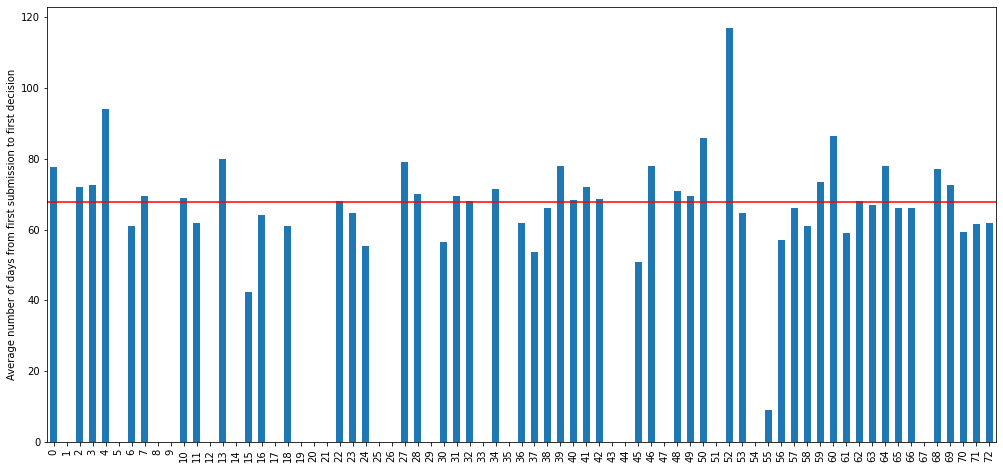

In [25]:
report_2021_df = filter_submitted_per_year(2021)
fig, ax = plt.subplots(figsize=(17,8))
avg_first_review_editors = report_2021_df.groupby('Editor Names').mean()['# Days Between Original Submission & Original Decision'].reset_index(drop=True)
avg_first_review_editors.plot(kind='bar', ax=ax)
ax.axhline(y=avg_first_review_editors.mean(), color='r')
ax.set_ylabel('Average number of days from first submission to first decision')

In [26]:
avg_first_review_editors.mean()27

67.75320512820514

In [27]:
latest_submission_date = report_2021_df['Original Submission Date'].max()
ytd_submissions = count_submitted_per_date_range(datetime.datetime(year=latest_submission_date.year, month=1, day=1), latest_submission_date)
mtd_submissions = count_submitted_per_date_range(datetime.datetime(year=latest_submission_date.year, month=latest_submission_date.month, day=1), latest_submission_date)
priot_year_submissions = count_submitted_per_date_range(latest_submission_date - datetime.timedelta(days=365), latest_submission_date)

num_submissions_df = pd.DataFrame({
    "YTD": [ytd_submissions],
    "MTD": [mtd_submissions],
    "Prior 12 Months": [priot_year_submissions],
    "Monthly Average": [priot_year_submissions / 12]
})

num_submissions_df


,YTD,MTD,Prior 12 Months,Monthly Average
0,364,61,845,70.416667
